In [14]:
import pandas as pd

df = pd.read_csv("Delivery_Logistics.csv")
df.head()


,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600


In [15]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_id          25000 non-null  float64
 1   delivery_partner     25000 non-null  object 
 2   package_type         25000 non-null  object 
 3   vehicle_type         25000 non-null  object 
 4   delivery_mode        25000 non-null  object 
 5   region               25000 non-null  object 
 6   weather_condition    25000 non-null  object 
 7   distance_km          25000 non-null  float64
 8   package_weight_kg    25000 non-null  float64
 9   delivery_time_hours  25000 non-null  object 
 10  expected_time_hours  25000 non-null  object 
 11  delayed              25000 non-null  object 
 12  delivery_status      25000 non-null  object 
 13  delivery_rating      25000 non-null  int64  
 14  delivery_cost        25000 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [16]:
df.columns


Index(['delivery_id', 'delivery_partner', 'package_type', 'vehicle_type',
       'delivery_mode', 'region', 'weather_condition', 'distance_km',
       'package_weight_kg', 'delivery_time_hours', 'expected_time_hours',
       'delayed', 'delivery_status', 'delivery_rating', 'delivery_cost'],
      dtype='object')

In [17]:
df.isnull().sum()


,0
delivery_id,0
delivery_partner,0
package_type,0
vehicle_type,0
delivery_mode,0
region,0
weather_condition,0
distance_km,0
package_weight_kg,0
delivery_time_hours,0


In [18]:
df.describe()


,delivery_id,distance_km,package_weight_kg,delivery_rating,delivery_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,150.390436,25.145898,3.666000,864.944579
std,7212.732314,86.409745,14.368663,1.149964,435.712593
min,250.990000,3.600000,0.670000,1.000000,95.667400
25%,6250.750000,75.900000,12.680000,3.000000,490.800000
50%,12500.500000,151.000000,25.145000,4.000000,867.535000
75%,18750.250000,224.900000,37.660000,5.000000,1237.910000
max,24750.010000,297.100000,49.520000,5.000000,1632.720600


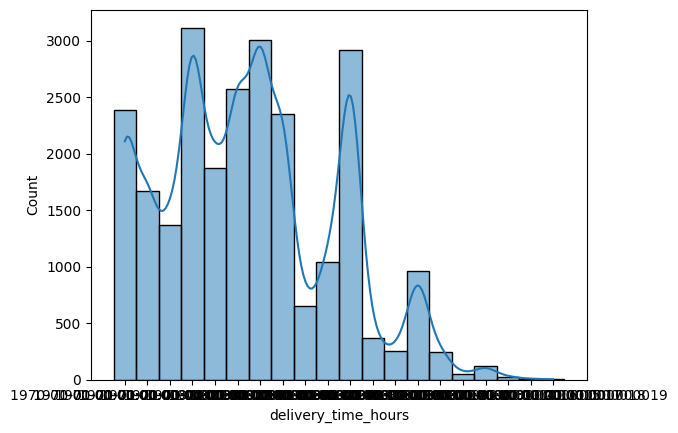

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['delivery_time_hours'], kde=True)
plt.show()

In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [21]:
import pandas as pd

# Re-load the dataframe to ensure a clean state for feature engineering
df = pd.read_csv("Delivery_Logistics.csv")

# Convert 'delivery_time_hours' and 'expected_time_hours' to numerical values (hours)
# This extracts the numerical part from strings like '1970-01-01 00:00:00.000000008'
df['delivery_time_hours'] = df['delivery_time_hours'].apply(
    lambda x: float(str(x).split('.')[-1]) if isinstance(x, str) and '.' in str(x) else x
)
df['expected_time_hours'] = df['expected_time_hours'].apply(
    lambda x: float(str(x).split('.')[-1]) if isinstance(x, str) and '.' in str(x) else x
)

# Define the target variable y
y = df['delivery_time_hours']

# Define the features X by dropping the target variable and 'delivery_id'
X = df.drop(['delivery_time_hours', 'delivery_id'], axis=1)

# Apply one-hot encoding to categorical features in X
X = pd.get_dummies(X, drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
df['Cost_per_KM'] = df['delivery_cost'] / df['distance_km']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 1.1965980493586053
R2: 0.7608344771253656


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(rf, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [13]:
importances = best_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df.head()


,Feature,Importance
0,distance_km,0.564811
37,weather_condition_stormy,0.163779
36,weather_condition_rainy,0.108392
34,weather_condition_foggy,0.039578
4,delivery_cost,0.026356
